In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
list(train.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [11]:
test = pd.read_csv('test.csv')

In [12]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
list(test.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [14]:
train_original = train.copy()

In [15]:
test_original = test.copy()

In [16]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
train.shape

(614, 13)

In [18]:
test.shape

(367, 12)

In [19]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
train['Loan_Status'].value_counts(normalize = True)
#normalize means to show as in proportions

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

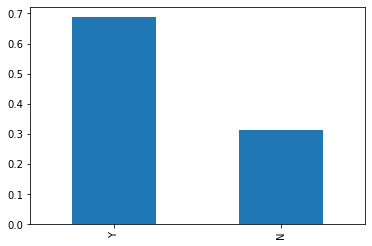

In [21]:
train['Loan_Status'].value_counts(normalize = True).plot.bar()

In [22]:
#Aroud 69% of people out of 614 have approved.

In [23]:
#Around 31% of people out of 614 have not been approved.

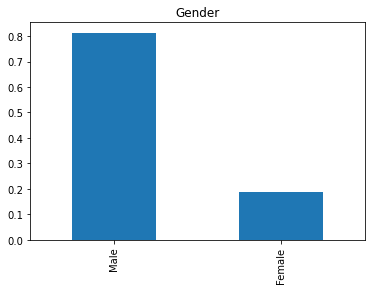

In [24]:
train['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')

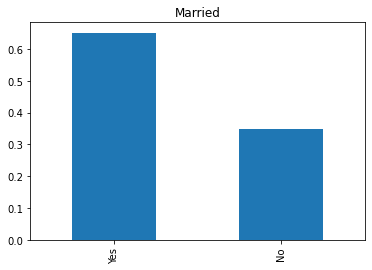

In [25]:
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')

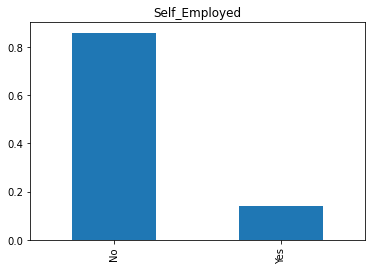

In [26]:
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self_Employed')

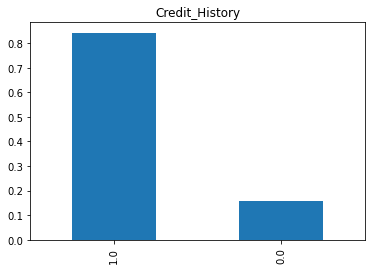

In [27]:
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')

In [28]:
#• 80% of applicants in the dataset are male.
#• Around 65% of the applicants in the dataset are married.
#• Around 15% of applicants in the dataset are self-employed.
#• Around 85% of applicants have repaid their doubts.

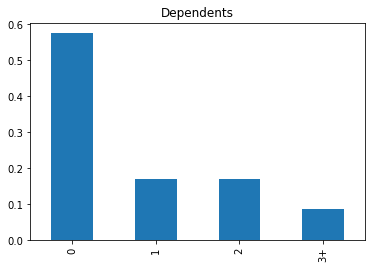

In [29]:
train['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')

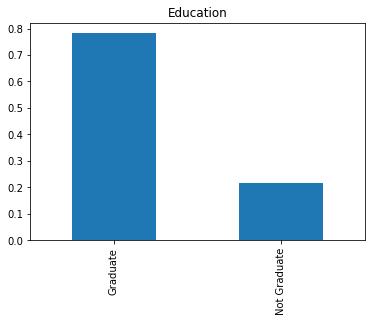

In [30]:
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')

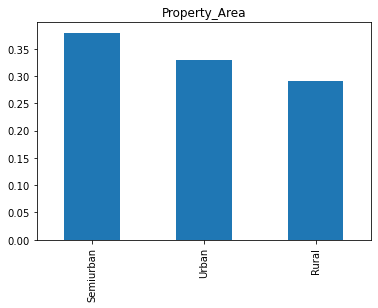

In [31]:
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

In [32]:
#Most of the applicants don't have any dependents.
#Around 80% of the applicants are Graduate.
#Most of the applicants are from the Semiurban area.

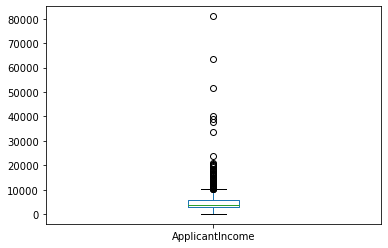

In [33]:
train.ApplicantIncome.plot.box()

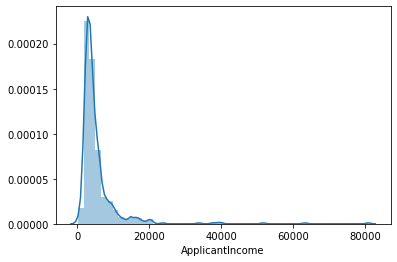

In [34]:
sns.distplot(train['ApplicantIncome'])

Text(0.5, 0.98, '')

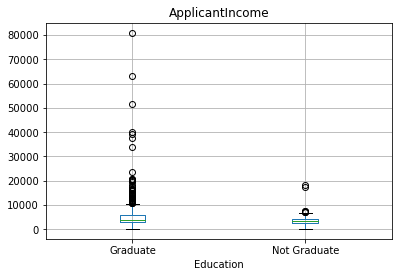

In [35]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

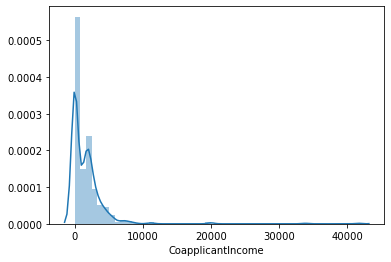

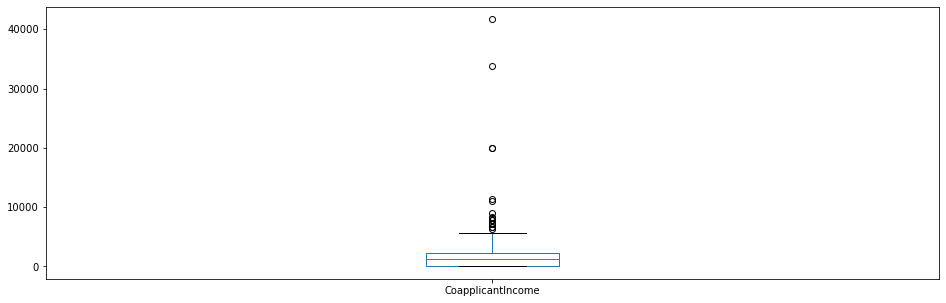

In [36]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize = (16,5))
plt.show()

In [37]:
gender = pd.crosstab(train['Gender'], train['Loan_Status'])

In [38]:
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


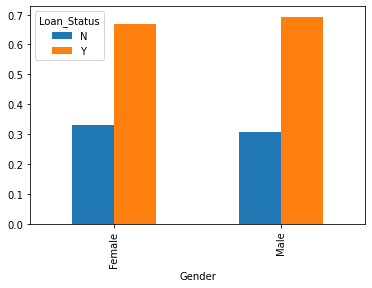

In [39]:
gender.div(gender.sum(1).astype(float), axis = 0).plot(kind = 'bar')

In [40]:
gender.div(gender.sum(1).astype(float), axis = 0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [41]:
gender.sum(1).astype(float)

Gender
Female    112.0
Male      489.0
dtype: float64

In [42]:
married = pd.crosstab(train['Married'], train['Loan_Status'])
dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
education = pd.crosstab(train['Education'], train['Loan_Status'])
self_employed= pd.crosstab(train['Self_Employed'], train['Loan_Status'])

In [43]:
married_loan_status = married.div(married.sum(1).astype(float), axis = 0)

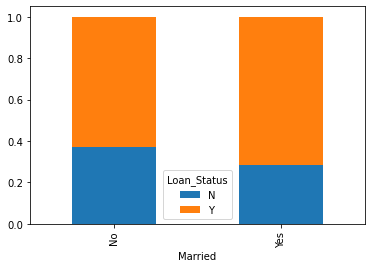

In [44]:
married_loan_status.plot.bar(stacked = 1)

In [45]:
dependents_loan_status = dependents.div(dependents.sum(1).astype(float), axis = 0)

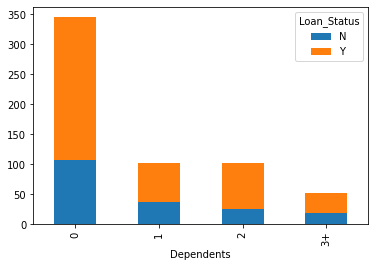

In [46]:
dependents.plot.bar(stacked = 1)

In [96]:
dependents_loan_status

Loan_Status,N,Y
Dependents,,
0,0.310145,0.689855
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059


In [47]:
education_loan_status = education.div(education.sum(1).astype(float), axis = 0)

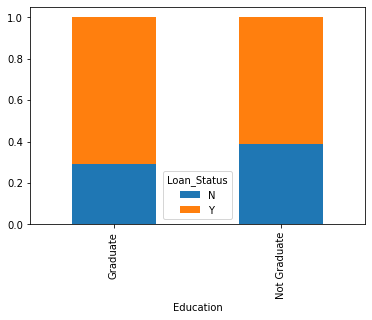

In [48]:
education_loan_status = education_loan_status.plot.bar(stacked = 1)

In [49]:
self_employed_loan_status = self_employed.div(self_employed.sum(1).astype(float), axis = 0)

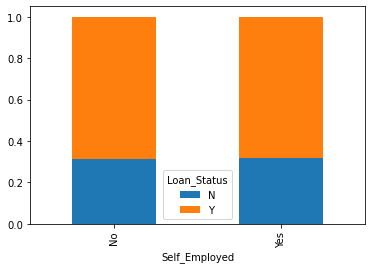

In [50]:
self_employed_loan_status.plot.bar(stacked = 1)

In [51]:
credit_history = pd.crosstab(train['Credit_History'], train.Loan_Status)
property_area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

In [52]:
credit_history_loan_status = credit_history.div(credit_history.sum(1).astype(float), axis = 0)
property_area_loan_status = property_area.div(property_area.sum(1).astype(float), axis = 0)

In [95]:
credit_history_loan_status

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


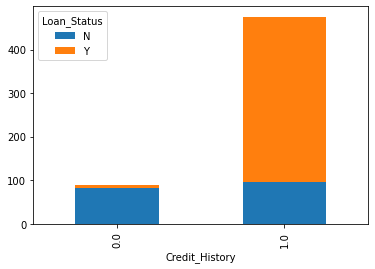

In [53]:
credit_history.plot.bar(stacked = 1)

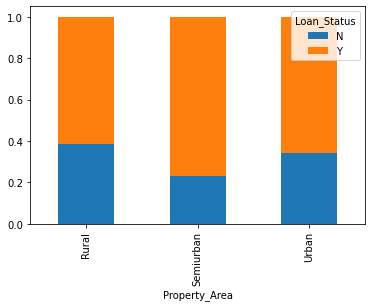

In [54]:
property_area_loan_status.plot.bar(stacked = 1)

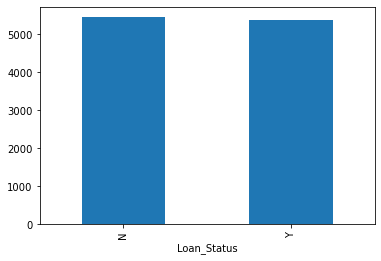

In [55]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [56]:
bins = [0, 2500, 4000, 6000, 81000]

In [57]:
group = ['Low', 'Average','High','Very High']

In [58]:
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels = group)

In [59]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])

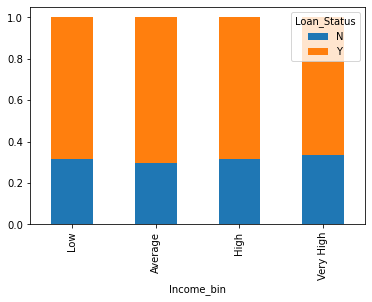

In [60]:
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True)

In [61]:
bin = [0,1000, 3000, 42000]
group = ['Low', 'Average', 'High', 'Very High']
train['CoapplicantIncome_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

In [62]:
CoApplicant_Income_bin = pd.crosstab(train['CoapplicantIncome_bin'], train['Loan_Status'])

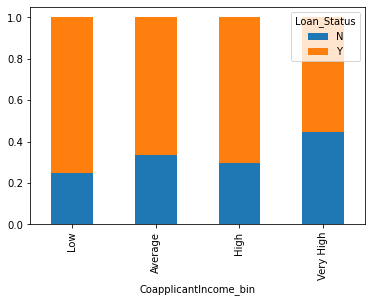

In [63]:
CoApplicant_Income_bin.div(CoApplicant_Income_bin.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

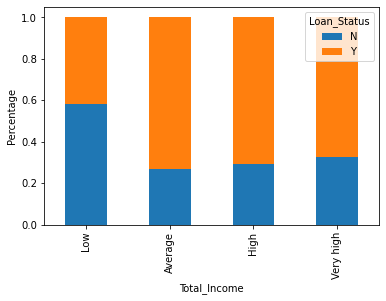

In [64]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

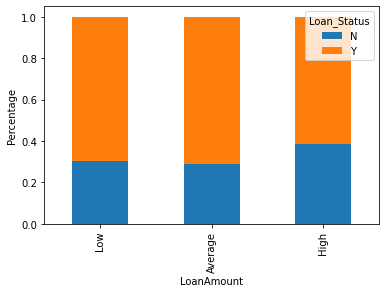

In [65]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [66]:
train = train.drop(['Income_bin','CoapplicantIncome_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis = 1)
train['Dependents'].replace('3+',3,inplace = True)
test['Dependents'].replace('3+', 3, inplace = True)
train['Loan_Status'].replace('N', 0, inplace = True)
train['Loan_Status'].replace('Y', 1, inplace = True)

In [67]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [68]:
matrix = train.corr()

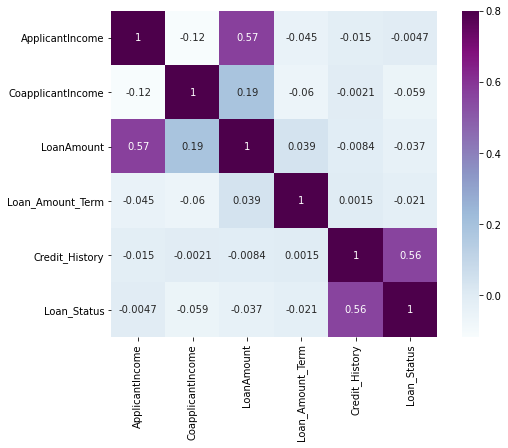

In [69]:
f,ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap = "BuPu", annot = True)

In [70]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [71]:
train['Gender'].fillna(train['Gender'].mode()[0],   inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [72]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [73]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [74]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [75]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

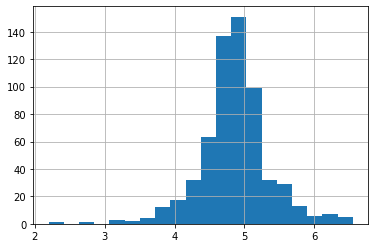

In [77]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [78]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [79]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [80]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [81]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [82]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [86]:
pred_cv = model.predict(x_cv)

In [87]:
accuracy_score(y_cv,pred_cv)

0.8

In [88]:
pred_test = model.predict(test)

In [89]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [90]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [91]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [92]:
#We need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

In [93]:
submission['Loan_Status'].replace(0,'N', inplace = True)
submission['Loan_Status'].replace(1,'Y', inplace = True)

In [94]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [97]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
i = 1